In [1]:
print('Module 6: Post-docking analysis')

Module 6: Post-docking analysis


In [2]:
import sys
import numpy as np
import pandas as pd
np.set_printoptions(threshold=sys.maxsize)
import argparse

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Descriptors

# Parse input

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('-r','--result', help = 'The outcome file from the step of VS', required=True)
parser.add_argument('-a','--train_active', help = 'Active compounds used in training', required=True)
parser.add_argument('-i','--train_inactive', help='Inactive compounds used in training', required=True)
args = parser.parse_args()

# Make functions

In [3]:
def read_screen_result(name):
    outcome = pd.read_csv(name, header=0)
    print('VS outcome is loaded')
    print('VS evaluated '+str(outcome.shape[0])+' compounds')
    #outcome.columns = ['Catalog ID', 'smiles', 'RF_prediction_score']
    #outcome = outcome.drop('smiles', axis=1)
    return outcome

In [4]:
def read_screen_library(name):
    outcome = pd.read_csv(name, header=0)
    return outcome

In [5]:
def read_cmpds_fp(name):
    print("Read training set fingerprint files")
    df=pd.read_csv(name)
    return df

In [6]:
def get_properties(df,column):
    print("Calcuating properties...")
    MolWt=[]
    MolLogP=[]
    NumHAcceptors=[]
    NumHDonors=[]
    NumRotatableBonds=[]
    TPSA=[]
    QED=[]
    for i in df[column]:
        m = Chem.MolFromSmiles(i)
        MolWt.append(Descriptors.MolWt(m))
        MolLogP.append(Descriptors.MolLogP(m))
        NumHAcceptors.append(Descriptors.NumHAcceptors(m))
        NumHDonors.append(Descriptors.NumHDonors(m))
        NumRotatableBonds.append(Descriptors.NumRotatableBonds(m))
        TPSA.append(Descriptors.TPSA(m))
        QED.append(Chem.QED.qed(m))
        #print(i)

    df['MolWt']=MolWt
    df['MolLogP']=MolLogP
    df['NumHAcceptors']=NumHAcceptors
    df['NumHDonors']=NumHDonors
    df['NumRotatableBonds']=NumRotatableBonds
    df['TPSA']=TPSA
    df['QED']=QED
    return df

In [7]:
def property_distribution(result_properties, actives_properties, inactives_properties, prop, name):
    print("Plotting for "+prop)
    percent_1 = int(len (result_properties) / 100)
    sns.histplot(result_properties[prop], kde=True, stat = 'density', color= 'blue', label='full library')
    sns.histplot(result_properties.iloc[:percent_1][prop], kde=True, stat = 'density', color = 'red', label='top 1% VS hits')
    sns.histplot(actives_properties[prop], kde=True, stat = 'density', color= 'green', label='active training cmpds')
    sns.histplot(inactives_properties[prop], kde=True, stat = 'density', color= 'yellow', label='inactive training cmpds')
    plt.legend()
    plt.savefig(prop+"_property_distribution_for_"+name+".png", dpi=300)
    plt.clf()

In [44]:
def VS_score_distribution(result, column, name):
    print("Plotting for "+column)
    percent_1 = int(len (result) / 100)
    sns.histplot(result[column], kde=True, stat = 'probability', color= 'blue', label='full library', bins = 200)
    sns.histplot(result.iloc[:percent_1][column], kde=True, stat = 'probability', color = 'red', label='top 1% VS hits', bins =50)
    plt.legend()
    plt.savefig(column+"_distribution_"+name+".png", dpi=300)
    plt.clf()

In [9]:
def write_out(outcome,name):
    file_name=str(name)
    outcome.to_csv(file_name+'.csv',index=False)
    print ("Done. Properties calculated and compared. Calculated properties are saved to the disk")
    return

# Use functions

In [ ]:
result = read_screen_result(args.result)
col_name = result.columns[2]
result = result.sort_values(by=[col_name],ascending=False)
result_properties = get_properties(result, 'smiles')

In [ ]:
actives = read_cmpds_fp(args.train_active)
inactives = read_cmpds_fp(args.train_inactive)
actives_properties = get_properties(actives, 'canonical_smiles')
inactives_properties = get_properties(inactives, 'canonical_smiles')

In [ ]:
VS_score_distribution(result, col_name, args.result)

property_distribution(result_properties, actives_properties, inactives_properties, 'MolWt', args.result)
property_distribution(result_properties, actives_properties, inactives_properties, 'MolLogP', args.result)
property_distribution(result_properties, actives_properties, inactives_properties, 'NumHAcceptors', args.result)
property_distribution(result_properties, actives_properties, inactives_properties, 'NumHDonors', args.result)
property_distribution(result_properties, actives_properties, inactives_properties, 'NumRotatableBonds', args.result)
property_distribution(result_properties, actives_properties, inactives_properties, 'TPSA', args.result)
property_distribution(result_properties, actives_properties, inactives_properties, 'QED', args.result)

In [ ]:
write_out(result_properties,args.result+'_properties_calculated')

# Exmaple

In [10]:
result=read_screen_result('CDK1_50K_VS_MLP.csv').sort_values(by=['MLP_prediction_score'],ascending=False)
result_properties = get_properties(result, 'smiles')

VS outcome is loaded
VS evaluated 50240 compounds
Calcuating properties...


In [11]:
actives = read_cmpds_fp('actives_CDK1_cmpds_fp.csv')
inactives = read_cmpds_fp('inactives_CDK1_cmpds_fp.csv')
actives_properties = get_properties(actives, 'canonical_smiles')
inactives_properties = get_properties(inactives, 'canonical_smiles')

Read training set fingerprint files
Read training set fingerprint files
Calcuating properties...
Calcuating properties...


In [46]:
VS_score_distribution(result, 'MLP_prediction_score','MLP_1')

Plotting for MLP_prediction_score


<Figure size 432x288 with 0 Axes>

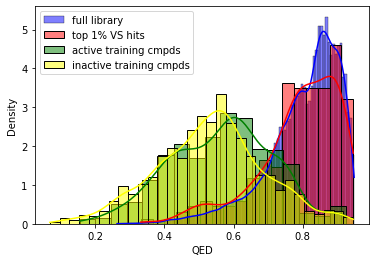

In [216]:
property_distribution(result_properties, actives_properties, inactives_properties, 'QED')

In [227]:
write_out(result_properties,'CDK1_50K_VS_properties')

Done. Properties calculated and compared. Calculated properties are saved to the disk
